<a href="https://colab.research.google.com/github/taimoorarsalan67/Code_for_Codexcue/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Change CPU**

In [46]:
!nvidia-smi

Fri May 31 20:00:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Mount Google Drive**

In [47]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **DataSet Path**

In [48]:
file_path = '/content/gdrive/MyDrive/CODEXCUE_DATA_SETS/Linear_Regression_tips.csv'

# **Loading Dataset**

In [49]:
import pandas as pd
df = pd.read_csv(file_path)


# **Display and Exploring Dataset For Check Missing value**

In [50]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Set the display width to be unlimited
pd.set_option('display.max_colwidth', None)  # Set the max column width to be unlimited


print(df)

     total_bill    tip     sex smoker   day    time  size
0         16.99   1.01  Female     No   Sun  Dinner     2
1         10.34   1.66    Male     No   Sun  Dinner     3
2         21.01   3.50    Male     No   Sun  Dinner     3
3         23.68   3.31    Male     No   Sun  Dinner     2
4         24.59   3.61  Female     No   Sun  Dinner     4
5         25.29   4.71    Male     No   Sun  Dinner     4
6          8.77   2.00    Male     No   Sun  Dinner     2
7         26.88   3.12    Male     No   Sun  Dinner     4
8         15.04   1.96    Male     No   Sun  Dinner     2
9         14.78   3.23    Male     No   Sun  Dinner     2
10        10.27   1.71    Male     No   Sun  Dinner     2
11        35.26   5.00  Female     No   Sun  Dinner     4
12        15.42   1.57    Male     No   Sun  Dinner     2
13        18.43   3.00    Male     No   Sun  Dinner     4
14        14.83   3.02  Female     No   Sun  Dinner     2
15        21.58   3.92    Male     No   Sun  Dinner     2
16        10.3

In [51]:
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [52]:
df.isna().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

# Examining the dataset containing the dependent and independent variables

In [53]:
#Independent Variable: total_bill
#Dependent Variable: tip

# **Data Visualization**

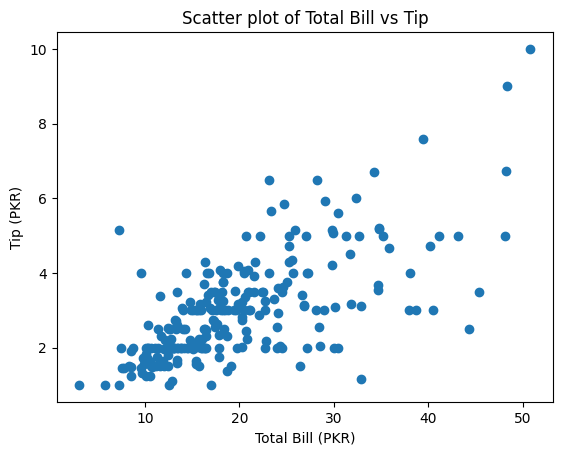

In [54]:
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill (PKR)')
plt.ylabel('Tip (PKR)')
plt.title('Scatter plot of Total Bill vs Tip')
plt.show()

# **Model Building**

In [55]:
X = df[['total_bill']]  # Independent variable
y = df['tip']           # Dependent variable

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test) #Y = F(B0,B1X)+e

# **Model Evalution**

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Intercept: 0.925235558557056
Coefficient: 0.10696370685268658
Mean Squared Error (MSE): 0.5688142529229536
Root Mean Squared Error (RMSE): 0.7541977545199625
R-squared: 0.5449381659234664


# **Model Result**

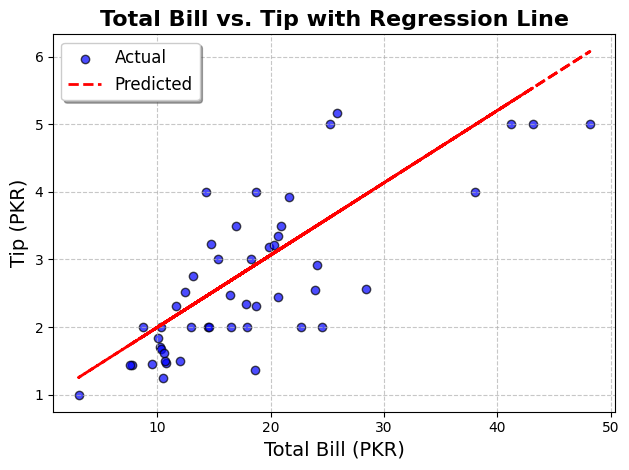

In [58]:
plt.scatter(X_test, y_test, color='blue', edgecolor='k', alpha=0.7, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, linestyle='--', label='Predicted')

plt.xlabel('Total Bill (PKR)', fontsize=14)
plt.ylabel('Tip (PKR)', fontsize=14)
plt.title('Total Bill vs. Tip with Regression Line', fontsize=16, fontweight='bold')

plt.legend(loc='best', frameon=True, shadow=True, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


# **Apply Input to check Result**

In [59]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Placeholder for the model's predict method
def predict_tip(total_bill):
    # Placeholder logic; replace with actual model prediction
    # This should be replaced with: model.predict([[total_bill]])
    return 0.15 * total_bill  # Example: 15% of the total bill

# Function to handle the prediction and display the result
def calculate_tip(b):
    total_bill = float(textbox_total_bill.value)
    if total_bill <= 2:
        result_label.value = "Sorry, no tips today 😔"
    elif total_bill > 40:
        result_label.value = "Ohh, you give the largest value from table bills 😠"
    else:
        predicted_tip = predict_tip(total_bill)
        result_label.value = f"Predicted tip amount: PKR {predicted_tip:.2f}"

# Create input widgets
textbox_total_bill = widgets.Text(
    value='',
    placeholder='Enter total bill amount',
    description='Total bill (PKR):',
    disabled=False
)

# Create button widget
button_predict = widgets.Button(
    description='Predict Tip',
    disabled=False,
    button_style='',
    tooltip='Click to predict tip',
    icon=''
)


result_label = widgets.Label(value='')

button_predict.on_click(calculate_tip)

display(textbox_total_bill)
display(button_predict)
display(result_label)


Text(value='', description='Total bill (PKR):', placeholder='Enter total bill amount')

Button(description='Predict Tip', style=ButtonStyle(), tooltip='Click to predict tip')

Label(value='')